In [1]:
import numpy as np
import sys
import drjit as dr 
import mitsuba as mi
mi.set_variant("cuda_ad_rgb")
sys.path.append("../../")
from PDE2D.utils.sketch import *
from PDE2D.BoundaryShape import *
import matplotlib.gridspec as gridspec
import matplotlib
from PDE2D import PATH
import os
from PDE2D.utils import *

In [2]:
linewidth = 1
frame_color = "white"
e_size = 3
def disable_ticks(ax):
    """Disable ticks around plot (useful for displaying images)"""
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])

def disable_ticks_y(ax):
    """Disable ticks around plot (useful for displaying images)"""
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticks([])

def disable_border(ax):
    """Disable border around plot"""
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

In [3]:

col_width = COLUMN_WIDTH

matplotlib.rcParams.update(MPL_STYLE)

## SDF FD Test

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

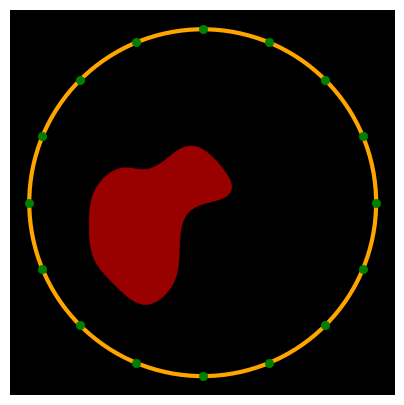

In [4]:
box_length = 2.1
box_center = [0,0]
sdf_res = 16
num_electrodes = 16
injections  = mi.Vector2f([0,10])
sdf_array   = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1, 1, 1, 1, 1,-1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1, 1,-1, 1,-1,-1,-1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1,-1,-1,-1,-1,-1,-1,-1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1,-1,-1,-1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1,-1,-1,-1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1,-1,-1,-1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1, 1,-1,-1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1, 1, 1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


in_shape = SDFGrid(tensor_np= sdf_array, box_length=box_length, box_center=box_center, name = "in-boundary",
                              redistance = True, low_res = sdf_res)
out_shape = CircleWithElectrodes(origin = mi.Vector2f(0.0, 0.0), radius = 1.0, name = "out-boundary", 
                                 injection_confs=[[0,10]], is_delta=True)
shape = BoundaryWithDirichlets(out_boundary=out_shape, dirichlet_boundaries=[in_shape], dirichlet_values = [0])

input = DataHolder(shape)

wos = WostConstant(input)

#electrode_nums = [1,2,3,4,5,6,7,8,9,11,12,13,14,15]
electrode_nums = np.arange(16)
fig, ax = plt.subplots(1,1, figsize = (5,5))
wos.input.shape.sketch_image(ax, bbox = [[-1.11,-1.11],[1.11,1.11]], resolution = [1024,1024])

In [5]:
distance = 0.01
iter_fd = 128
fd_step = 0.005
path_prb = os.path.join(PATH, "output2D", "finite_differences", "discrete-sdf", "prb")
path_fd = os.path.join(PATH, "output2D", "finite_differences", "discrete-sdf", "fd", f"fd{fd_step}")


fd_x = []
fd_y = []
for i in range(iter_fd):
    fd_x.append(np.load(os.path.join(path_fd, f"x-{i}.npy")))
    fd_y.append(np.load(os.path.join(path_fd, f"y-{i}.npy")))

grad_fd_x = np.sum(np.array(fd_x), axis = 0) / iter_fd
grad_fd_y = np.sum(np.array(fd_y), axis = 0) / iter_fd



grad_x_01 = np.load(os.path.join(path_prb, f"gradx-d0.01.npy")).squeeze()
grad_y_01 = np.load(os.path.join(path_prb, f"grady-d0.01.npy")).squeeze()
grad_x_1 = np.load(os.path.join(path_prb, f"gradx-d0.1.npy")).squeeze()
grad_y_1 = np.load(os.path.join(path_prb, f"grady-d0.1.npy")).squeeze()
grad_x_2 = np.load(os.path.join(path_prb, f"gradx-d0.2.npy")).squeeze()
grad_y_2 = np.load(os.path.join(path_prb, f"grady-d0.2.npy")).squeeze()

In [6]:
def plot_primals(ax, data, entry_nums, num_entries, names, colors, fontsize = 7, label = True, scale = 1.2, grid = True, legend = True):
    max_val = -np.inf
    min_val = np.inf
    el_means = {}
    electrodes = np.arange(num_entries)
    for i, vals in enumerate(data):
        val = np.zeros(num_entries)
        val[entry_nums] = data[i]
        el_means[names[i]] = val         
        max_val = max(np.max(data[i]), max_val)
        min_val = min(np.min(data[i]), min_val)
    el_names = [f"{electrodes[i]}" for i in range(num_entries)]
    

    x = np.arange(num_entries)  # the label locations
    width = 0.2# the width of the bars
    multiplier = 1

    for i, (attribute, measurement) in enumerate(el_means.items()):
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, color = colors[i])
        if label:
            ax.bar_label(rects, padding=3, fmt="%.2e", rotation = "vertical", 
                         label_type = "center", fontsize = fontsize)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Voltage V')
    ax.set_title('Primal Comparison')
    ax.set_xticks(x[::2] + width + 0.3, el_names[::2])
    if legend:
        ax.legend(loc='upper left', fontsize = 3.8, ncol = 2)
    ax.set_ylim(scale * min_val, scale * max_val)
    if grid:
        ax.grid()
    
    ax.axhline(y = 0, linewidth = 0.3, color = "black")

In [7]:

def plot_shape_sdf(shape, ax, bbox, resolution):
    image = shape.in_boundaries[0].sketch_image(ax, bbox = bbox, resolution = resolution, channel = 2)
    black_region = image.sum(axis = 2) < 0.1
    image[black_region]  = 1
    shape.out_boundary.sketch(ax, bbox, resolution, lw = linewidth, e_size=e_size)
    ax.imshow(image)
    ax.axis("on")
    disable_ticks(ax)
    disable_border(ax)

GPL Ghostscript 9.55.0: Can't embed the complete font LinBiolinumT as it is too large, embedding a subset.
GPL Ghostscript 9.55.0: Can't embed the complete font LinLibertineT as it is too large, embedding a subset.


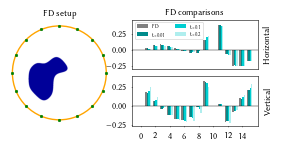

In [8]:
colors = ["grey", "darkcyan", "darkturquoise", "paleturquoise"]
s1 = 4.5
s2 = 11
pad1 = 1
pad2 = 1
scale = col_width / (2 * s1 + s2 +  pad1 + pad2) 
fig = plt.figure(figsize= (((2 * s1 + s2 + pad1+ pad2) * scale, (2 * s1) * scale)))
s1 = 4
s2 = 10
g = gridspec.GridSpec(2 * s1 , (2 * s1 + s2 + pad1+ pad2), figure = fig, wspace = 3, hspace=1)
ax = fig.add_subplot(g[:,:])
disable_ticks(ax)
plt.setp(ax.spines.values(), color="white")
ax_shape = fig.add_subplot(g[:, :2 * s1])
ax_x = fig.add_subplot(g[:s1, 2 * s1 + pad1: - pad2])
ax_y = fig.add_subplot(g[s1:, 2 * s1 + pad1: -pad2])
#shape_holder.sketch(ax_shape, bbox = [[-1.11,-1.11],[1.11,1.11]], resolution = [1024,1024])
bbox = [[-1.05,-1.05],[1.05,1.05]]
resolution = [1024, 1024]
plot_shape_sdf(shape, ax_shape, bbox, resolution)
plot_primals(ax_x, [grad_fd_x, grad_x_01, grad_x_1, grad_x_2], electrode_nums, num_electrodes, 
             ["FD", "t=0.01", "t=0.1", "t=0.2"], colors = colors, label = False, grid = False)
plot_primals(ax_y, [grad_fd_y, grad_y_01, grad_y_1, grad_y_2],  electrode_nums, num_electrodes, 
             ["FD", "t=0.01", "t=0.1" , "t=0.2"], colors = colors, label = False, legend = False, grid = False)
pad = 3
ax_shape.set_title("FD setup", fontsize = DEFAULT_FONTSIZE_SMALL, pad = pad + 2.6)
ax_x.set_title("FD comparisons", fontsize = DEFAULT_FONTSIZE_SMALL, pad = pad)
ax_y.set_title("")
ax_x.yaxis.set_label_position("right")
ax_y.yaxis.set_label_position("right")
ax_x.set_ylabel("Horizontal", fontsize =DEFAULT_FONTSIZE_SMALL)
ax_y.set_ylabel("Vertical", fontsize = DEFAULT_FONTSIZE_SMALL)
for tick in ax_x.xaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)
#fig.savefig("fd-sdf.pdf", bbox_inches='tight', pad_inches=0.005, dpi=300)
save_fig("fd-sdf", os.path.join(PATH, "figures"))
plt.savefig(os.path.join(PATH, "figures", "png", "fd-sdf.png"), bbox_inches='tight', pad_inches=0.04, dpi=750)